In [2]:
from tifffile import imread
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as clr
from matplotlib import cm
import numpy as np
import pandas as pd
from rich.progress import track

pd.options.mode.chained_assignment = None  # default='warn'

## Parameters and path

In [3]:
line_color = "white"  # #00274C
scalebar_color = "white"

cmap_color_start = "black"
cmap_color_end = "#b9dbf4"
cmap_name = "dark2blue"
cmap = clr.LinearSegmentedColormap.from_list(
    cmap_name,
    [cmap_color_start, cmap_color_end],
    N=200,
)

In [6]:
folder_save = "/Volumes/lsa-nwalter/Guoming_Gao_turbo/Walterlab_server/PROCESSED_DATA/RNA-diffusion-in-FUS/FRAP-FLIM-zstack/20230929-FLIM-FCS-FUS488-Cy5-HighLowOutside/488/tau_tif"
os.chdir(folder_save)
lst_files = [f for f in os.listdir(".") if f.endswith("tau_1 raw.tif")]
for f in lst_files:
    print(f)

fit fov4b tau_1 raw.tif
fit fov5b tau_1 raw.tif
fit fov5a tau_1 raw.tif
fit fov1a tau_1 raw.tif
fit fov3a tau_1 raw.tif
fit fov1b tau_1 raw.tif
fit fov2a tau_1 raw.tif
fit fov4a tau_1 raw.tif
fit fov3b tau_1 raw.tif
fit fov2b tau_1 raw.tif


### tau plot

(5.850675, 3.250107)

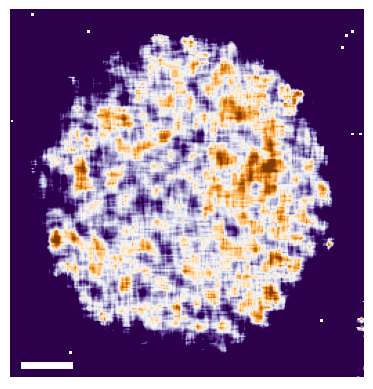

In [9]:
fname = "fit fov5b tau_1 raw.tif"
um_per_pixel_x = 0.0312
um_per_pixel_y = 0.0298
ratio_x2y = um_per_pixel_x / um_per_pixel_y
vmin = 3.3
vmax = 3.5

img = imread(fname)
img = img / 1e3
img[img == 0] = np.nan
plt.figure()
plt.imshow(
    img,
    cmap="PuOr",
    vmin=vmin,
    vmax=vmax,
    aspect=ratio_x2y,
)

# plot scale bar
scalebar_length_um = 1
scalebar_length_pxl_x = scalebar_length_um / um_per_pixel_x
plt.plot(
    [10, 10 + scalebar_length_pxl_x],
    [img.shape[1] - 10, img.shape[1] - 10],
    "-",
    color="white",
    lw=5,
)

plt.axis("off")
plt.savefig(
    fname[:-4] + ".png",
    dpi=600,
    format="png",
    bbox_inches="tight",
)

In [16]:
fname = "fit fov3b tau_1 raw.tif"
img = imread(fname)
img = img / 1e3
img[img == 0] = np.nan
np.nanmax(img[64:-64, 64:-64]), np.nanmin(img[64:-64, 64:-64]), np.nanmax(img)

(3.5128965, 3.2419844, 5.6457524)

In [17]:
fname = "fit fov4b tau_1 raw.tif"
img = imread(fname)
img = img / 1e3
img[img == 0] = np.nan
np.nanmax(img[64:-64, 64:-64]), np.nanmin(img[64:-64, 64:-64]), np.nanmax(img)

(3.493478, 3.21691, 5.6501656)

In [18]:
fname = "fit fov5b tau_1 raw.tif"
img = imread(fname)
img = img / 1e3
img[img == 0] = np.nan
np.nanmax(img[64:-64, 64:-64]), np.nanmin(img[64:-64, 64:-64]), np.nanmax(img)

(3.535624, 3.250107, 5.850675)

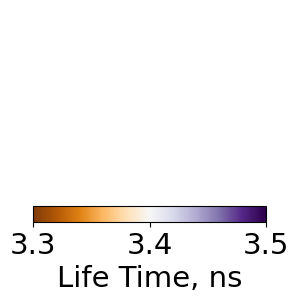

In [19]:
fontsize = 21
plt.figure(figsize=(3, 3))
# plot color bar for time
cbar = plt.colorbar(
    cm.ScalarMappable(norm=clr.Normalize(vmin, vmax), cmap="PuOr"),
    ax=plt.gca(),
    orientation="horizontal",
    # pad=0.05,
    drawedges=False,
    aspect=15,
)
cbar.set_label(
    label="Life Time, ns",
    fontsize=fontsize,
    # labelpad=10,
    # family="Arial",
)
cbar.set_ticks([3.3, 3.4, 3.5])
cbar.ax.tick_params(labelsize=fontsize)

plt.axis("off")
plt.savefig("/Volumes/lsa-nwalter/Guoming_Gao_turbo/Walterlab_server/PROCESSED_DATA/RNA-diffusion-in-FUS/RNAinFUS_PaperFigures/Fig3_coralled by nano domains/FUS488_FLIM/color_bar.png", dpi=600, format="png", bbox_inches="tight")
# plt.show()

In [6]:
# fname = lst_files[idx]
# img = imread(fname)
# um_per_pixel_xy = 0.04
# plt.figure(figsize=(7,2))
# plt.hist(img.reshape(-1), bins=100)
# plt.show()
# img = np.nan_to_num(img)
# idx += 1

### chi2 plot

In [7]:
fname2 = "fit fov6a chi2 raw.tif"
img2 = imread(fname2)
img2 = np.nan_to_num(img2)
um_per_pixel_xy = 0.04
plt.figure(figsize=(7,2))
plt.hist(img2.reshape(-1), bins=100)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/lsa-nwalter/Guoming_Gao_turbo/Walterlab_server/PROCESSED_DATA/RNA-diffusion-in-FUS/FRAP-FLIM-zstack/20230928-FLIM-FUS488-FCS-HighLowOutside/tau_tif/fit fov6a chi2 raw.tif'

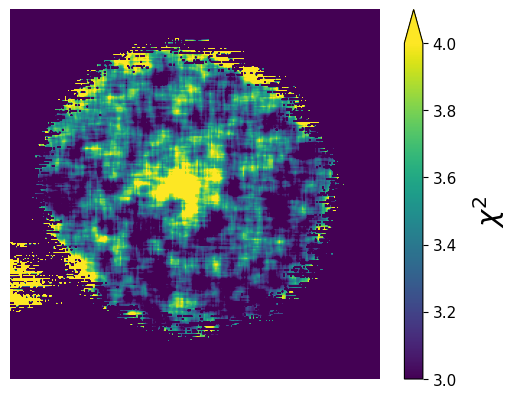

In [ ]:
plt.figure()
vmin=3
vmax=4
plt.imshow(
    img2,
    cmap="viridis",
    vmin=vmin,
    vmax=vmax,
)
# plot color bar for time
cbar = plt.colorbar(
    cm.ScalarMappable(norm=clr.Normalize(vmin, vmax), cmap="viridis"),
    ax=plt.gca(),
    orientation="vertical",
    pad=0.05,
    drawedges=False,
    extendfrac=0.1,
    extend="max",
)
cbar.set_label(
    label=r"$\chi^2$",
    weight="bold",
    fontsize=21,
    labelpad=10,
    family="Arial",
)
cbar.ax.tick_params(labelsize=11)
plt.axis("off")
plt.savefig(fname2[:-4]+".png", dpi=300, format="png", bbox_inches="tight")
plt.show()

In [ ]:
# plot scale bar
# scalebar_length_um = 1
# scalebar_length_pxl_x = scalebar_length_um / um_per_pixel_xy
# plt.plot(
#     [10, 10 + scalebar_length_pxl_x],
#     [10, 10],
#     "-",
#     color="white",
#     lw=5,
# )
# plt.gca().invert_yaxis()